<a href="https://colab.research.google.com/github/Yusuf-xx/Fuzzy-Control-System/blob/main/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Input objects hold universe variables

In [ ]:
dish = ctrl.Antecedent(np.arange(0, 50, 1), 'dish')
dirty = ctrl.Antecedent(np.arange(0, 100, 1), 'dirty')
washTime = ctrl.Consequent(np.arange(0, 90, 1), 'washTime')

Auto-membership function population

In [ ]:
dish.automf(3)
dirty.automf(3)

Custom membership functions

In [ ]:
dish['LOW'] = fuzz.trimf(dish.universe, [0, 0, 13])
dish['AVERAGE'] = fuzz.trimf(dish.universe, [0, 13, 25])
dish['HIGH'] = fuzz.trimf(dish.universe, [13, 25, 40])
dish['EXTRA HIGH'] = fuzz.trimf(dish.universe, [40, 50, 50])

In [ ]:
dirty['LIGHT'] = fuzz.trimf(dirty.universe, [0, 0, 25])
dirty['MEDIUM'] = fuzz.trimf(dirty.universe, [0, 25, 50])
dirty['HEAVY'] = fuzz.trimf(dirty.universe, [25, 50, 75])
dirty['VERY HEAVY'] = fuzz.trimf(dirty.universe, [75, 100, 100])

In [ ]:
washTime['SHORT'] = fuzz.trimf(washTime.universe, [0, 0, 30])
washTime['AVERAGE'] = fuzz.trimf(washTime.universe, [0, 30, 60])
washTime['LONG'] = fuzz.trimf(washTime.universe, [60, 90, 90])

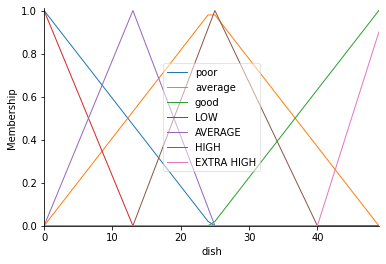

In [ ]:
dish.view()

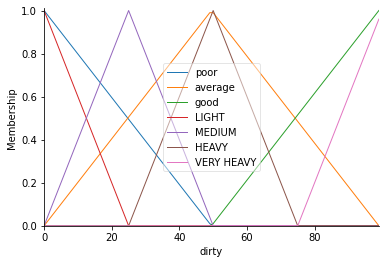

In [ ]:
dirty.view()

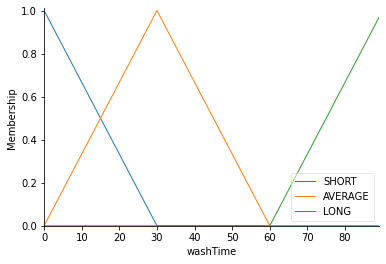

In [ ]:
washTime.view()

# 10 rules are :
1. If the number of dishes are *LOW* **OR** dirty level is *LIGHT*, THEN wash time will be *SHORT*
2. If the number of dishes are *AVERAGE* **OR** dirty level is *MEDIUM* THEN the wash time will be *AVERAGE*
3. If the number of dishes are *HIGH* **OR** dirty level is *HEAVY*, THEN the wash time will be *LONG*
4. If the number of dishes are *EXTRA HIGH* **OR** dirty level is *VERY HEAVY*, THEN the wash time will be *LONG*
5. If the number of dishes are LOW **AND** dirty level is *MEDIUM*, THEN the wash time will be *SHORT*
6. If the number of dishes are *AVERAGE* **AND** dirty level is *HEAVY*, THEN the wash time will be *AVERAGE*
7. If the number of dishes are *HIGH* **AND** dirty level is *VERY HEAVY*, THEN the wash time will be *LONG*
8. If the number of dishes are *EXTRA HIGH* **AND** dirty level is *MEDIUM*, THEN the wash time will be *LONG*
9. If the number of dishes are *AVERAGE* **AND** dirty level is very *LIGHT*, THEN the wash time will be *SHORT*
10. If the number of dishes are *LOW* **AND** dirty level is *VERY HEAVY*, THEN the wash time will be *AVERAGE*

In [ ]:
rule1 = ctrl.Rule(dish['LOW'] | dirty['LIGHT'], washTime['SHORT'])
rule2 = ctrl.Rule(dish['AVERAGE'] | dirty['MEDIUM'], washTime['AVERAGE'])
rule3 = ctrl.Rule(dish['HIGH'] | dirty['HEAVY'], washTime['LONG'])
rule4 = ctrl.Rule(dish['EXTRA HIGH'] | dirty['VERY HEAVY'], washTime['LONG'])
rule5 = ctrl.Rule(dish['LOW'] & dirty['MEDIUM'], washTime['SHORT'])
rule6 = ctrl.Rule(dish['AVERAGE'] & dirty['HEAVY'], washTime['AVERAGE'])
rule7 = ctrl.Rule(dish['HIGH'] & dirty['VERY HEAVY'], washTime['LONG'])
rule8 = ctrl.Rule(dish['EXTRA HIGH'] & dirty['MEDIUM'], washTime['LONG'])
rule9 = ctrl.Rule(dish['AVERAGE'] & dirty['LIGHT'], washTime['SHORT'])
rule10 = ctrl.Rule(dish['LOW'] & dirty['HEAVY'], washTime['AVERAGE'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f19e31a35d0>)

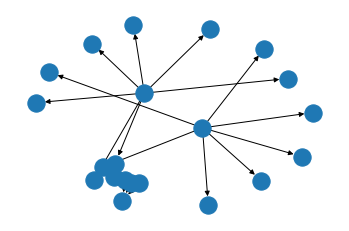

In [ ]:
rule10.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f19e31cec50>)

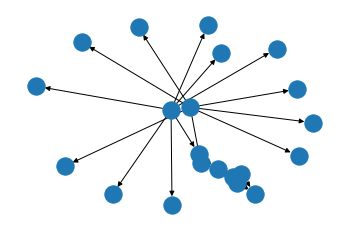

In [ ]:
rule1.view()

Control System

In [ ]:
washTime_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])

Control system for simulation

In [ ]:
WashTime = ctrl.ControlSystemSimulation(washTime_ctrl)

In [ ]:
WashTime.input['dish'] = 10
WashTime.input['dirty'] = 70

In [ ]:
time_taken = WashTime.compute()

Result can be viewed

36.30047586285973


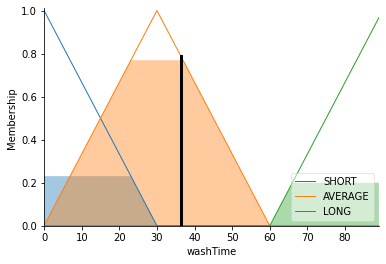

In [ ]:
print(WashTime.output['washTime'])
washTime.view(sim=WashTime)

In [ ]:
WashTime.input['dish'] = 17
WashTime.input['dirty'] = 62

In [ ]:
time_taken = WashTime.compute()

44.01643554549312


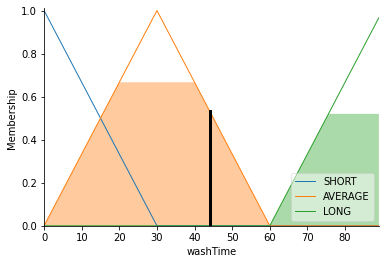

In [ ]:
print(WashTime.output['washTime'])
washTime.view(sim=WashTime)